In [67]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os


import json

import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [68]:
df_W=pd.read_csv('/Users/nikhilkishore/Dropbox/nyuclasses/PUI/201501-citibike-tripdata.csv')
print df_W.columns
df_S=pd.read_csv('/Users/nikhilkishore/Dropbox/nyuclasses/PUI/201509-citibike-tripdata.csv')

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [69]:
df_W['age'] = 2015-df_W['birth year'][(df_W['usertype'] == 'Subscriber')]
df_S['age'] = 2015-df_S['birth year'][(df_S['usertype'] == 'Subscriber')]

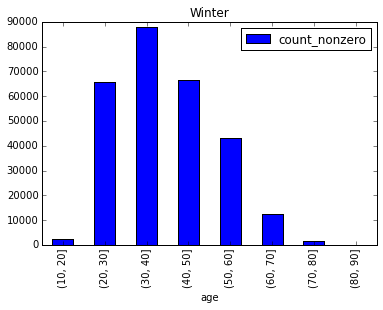

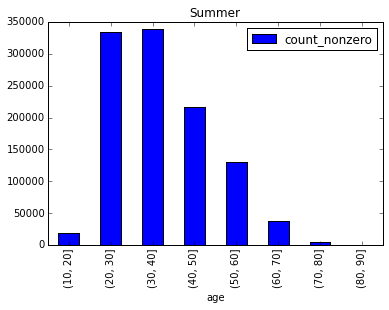

In [70]:
bins = np.arange(10, 99, 10)
df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
W_age_dist = df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero])
df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer")
S_age_dist = df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero])

In [71]:
ksW=scipy.stats.kstest(W_age_dist, 'norm')
ksS=scipy.stats.kstest(S_age_dist, 'norm')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

#compare to poisson 

ksW=scipy.stats.kstest(W_age_dist, 'cauchy')
ksS=scipy.stats.kstest(S_age_dist, 'cauchy')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit (1.0, 0.0)
summer, normal fit (1.0, 0.0)
winter, normal fit (0.99999637418970078, 0.0)
summer, normal fit (0.99999905995408844, 0.0)


In [72]:
ksW=scipy.stats.kstest(W_age_dist, 'gamma', args=(35,))
ksS=scipy.stats.kstest(S_age_dist, 'gamma', args=(35,))

print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit (1.0, 0.0)
summer, normal fit (1.0, 0.0)


In [73]:
def mydistribution(size, m0, m1):
    #this is a crazy dumb function, but i am trying to make a point here...
    return (np.empty_like(size)+1) * m0 **2

In [74]:
ksW=scipy.stats.kstest(W_age_dist, mydistribution, args=(35,38))
ksS=scipy.stats.kstest(S_age_dist, mydistribution, args=(35,38))

print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit (414799700.0, nan)
summer, normal fit (107543975.0, nan)


##AD Test

In [88]:
ageW = np.array([a for a in df_W.age if not np.isnan(a)])
ageS = np.array([b for b in df_S.age if not np.isnan(b)])

 

In [89]:
cW=ageW.cumsum()
cS=ageS.cumsum()

In [90]:
AdW=scipy.stats.anderson(cW, 'norm')
AdS=scipy.stats.anderson(cS, 'norm')
print "winter, normal fit", AdW[0]
print "summer, normal fit", AdS[0]

winter, normal fit 3146.28939143
summer, normal fit 12069.0075135


##Entropy

In [96]:
EnW = scipy.stats.entropy(W_age_dist, qk=None, base=None)
EnS = scipy.stats.entropy(S_age_dist, qk=None, base=None)
print "winter, normal fit", EnS
print "summer, normal fit", EnW
#print W_age_dist
#AD=scipy.stats.anderson(W_age_dist, 'norm')

winter, normal fit [ 1.51282656]
summer, normal fit [ 1.54560887]
